In [ ]:
# with 15 samples of orig. data getting 500 samples of syn data

# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=6
# to learn:
# data.info(), data.describe()
# https://www.kaggle.com/code/ankitapandav1212/dry-bean-dataset-using-knn-algorithm?scriptVersionId=112288982&cellId=20
# to learn:
# Imbalncing Technique, StratifiedKFold (?)

# https://www.kaggle.com/code/ziadhamadafathy/classify-dry-bean-with-accuracy-90-by-some-models
# to learn:
# sns.countplot(df['Class']), df['Class'].value_counts()
# SelectKBest for feature reduction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv("syn_bean_10.csv")
x = iris.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]].values
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             2500 non-null   float64
 1   Perimeter        2500 non-null   float64
 2   MajorAxisLength  2500 non-null   float64
 3   MinorAxisLength  2500 non-null   float64
 4   AspectRation     2500 non-null   float64
 5   Eccentricity     2500 non-null   float64
 6   ConvexArea       2500 non-null   float64
 7   EquivDiameter    2500 non-null   float64
 8   Extent           2500 non-null   float64
 9   Solidity         2500 non-null   float64
 10  roundness        2500 non-null   float64
 11  Class            2500 non-null   object 
dtypes: float64(11), object(1)
memory usage: 234.5+ KB


Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  31824.90     660.86           224.32           180.27          2.16   
1  31767.76     650.28           222.56           181.26         -0.92   
2  30007.41     646.04           210.87           183.29          1.42   
3  31157.07     643.03           215.55           184.47         -0.77   
4  32167.33     654.13           217.72           188.26          1.49   
5  31572.36     673.63           215.39           185.27          0.24   
6  31971.38     638.97           215.84           189.93          1.20   
7  28394.63     608.60           208.72           172.30          1.38   
8  31824.29     663.97           219.72           180.59          1.25   
9  31092.69     638.63           209.16           189.07         -0.22   

   Eccentricity  ConvexArea  EquivDiameter  Extent  Solidity  roundness  Class  
0         -0.99    32272.29         200.24    2.17      0.14       0.37  SEKER  
1         -0.03    32173.22         201.42    1.39      0.68      -0.89  SEKER  
2         -0.55    30722.91         193.09    1.12      0.45       1.32  SEKER  
3          0.13    31493.39         198.28    0.58      1.78       0.59  SEKER  
4          0.03    32521.71         201.87    1.18      2.28       2.31  SEKER  
5         -0.11    32198.15         200.31    1.27      0.63       0.82  SEKER  
6         -0.16    32246.37         203.02   -0.27      1.58       2.26  SEKER  
7          1.34    28716.29         189.82    0.61      2.01       2.18  SEKER  
8         -0.35    32271.72         201.93    1.91      1.28       0.82  SEKER  
9         -0.20    31457.74         199.53    0.14      0.86       0.26  SEKER

In [3]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["Class"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0     count
Class          
BARBUNYA    500
BOMBAY      500
CALI        500
HOROZ       500
SEKER       500

In [4]:
iris_1=iris.loc[iris["Class"]=="SEKER"]
iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
iris_3=iris.loc[iris["Class"]=="BOMBAY"]
iris_4=iris.loc[iris["Class"]=="CALI"]
iris_5=iris.loc[iris["Class"]=="HOROZ"]

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users

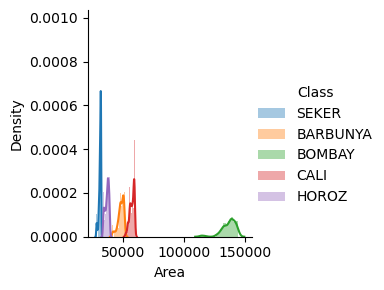

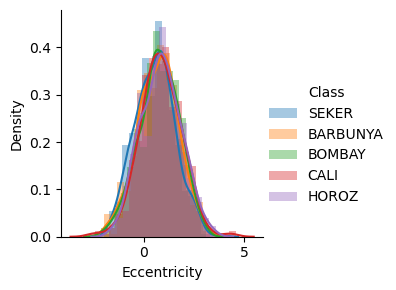

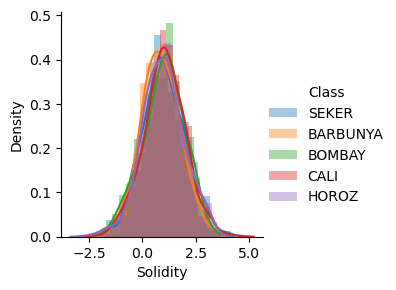

In [5]:
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Area").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Eccentricity").add_legend()
sns.FacetGrid(iris,hue="Class",height=3).map(sns.distplot,"Solidity").add_legend()
plt.show()

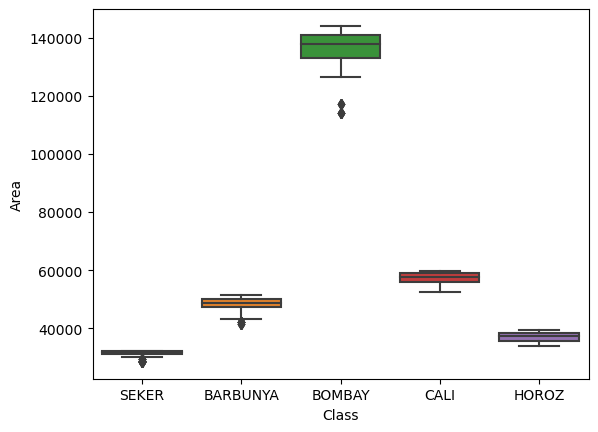

In [6]:
sns.boxplot(x="Class",y="Area",data=iris)
plt.show()

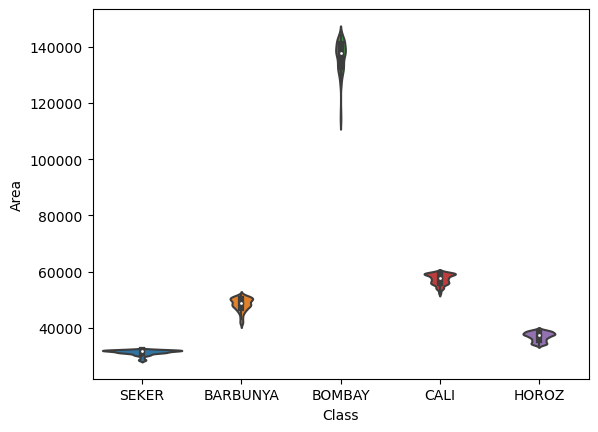

In [7]:
sns.violinplot(x="Class",y="Area",data=iris)
plt.show()

/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/maqowais/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


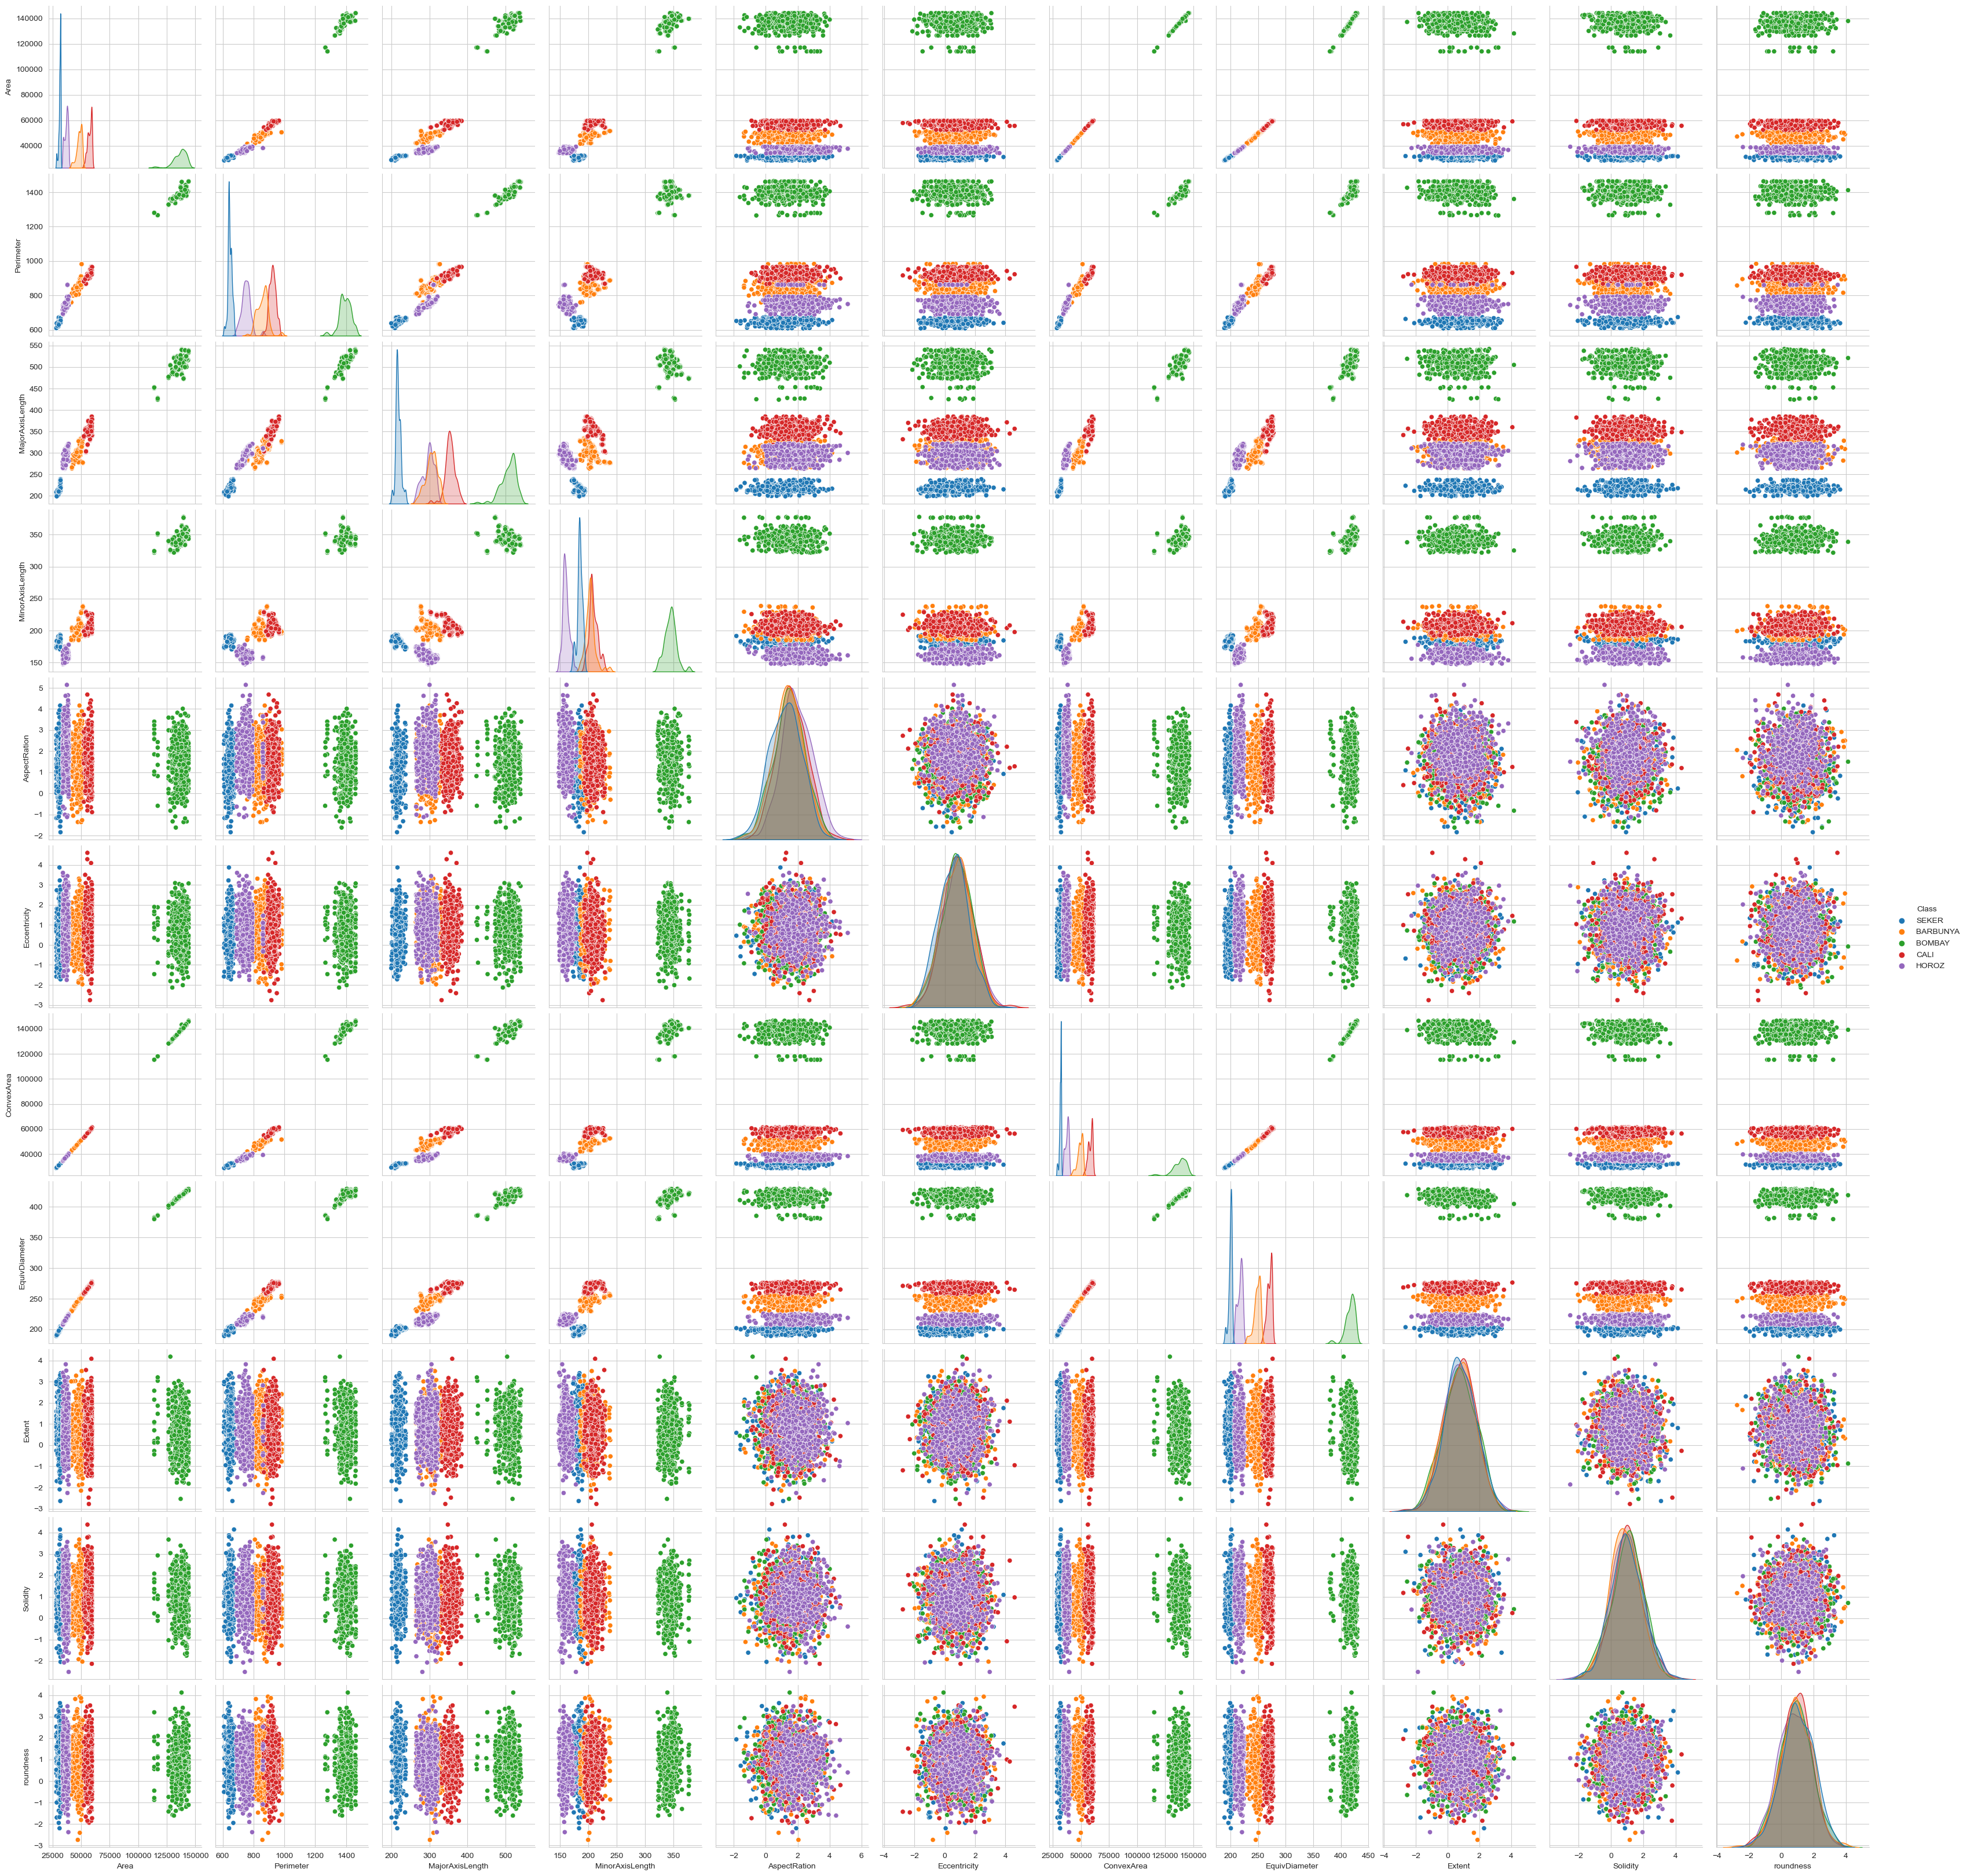

In [8]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="Class",size=3);
plt.show()

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


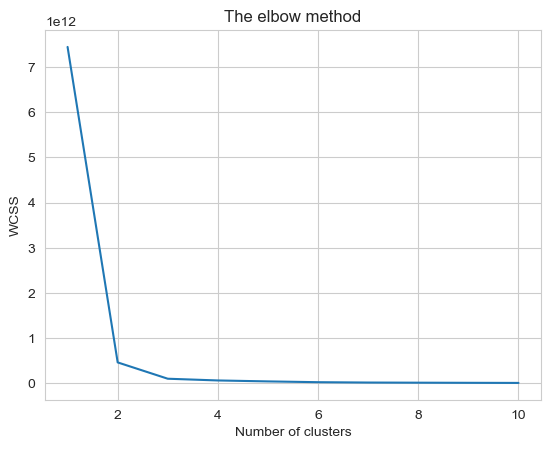

In [10]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


In [11]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

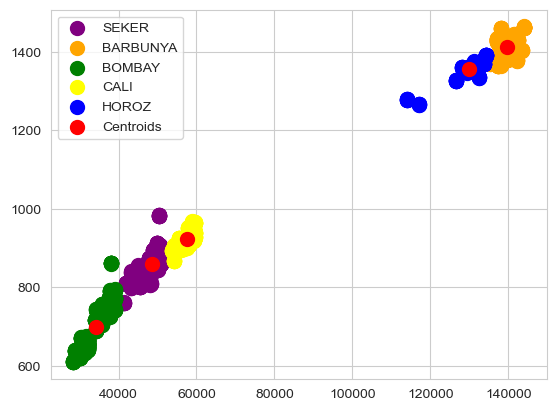

In [12]:
# iris_1=iris.loc[iris["Class"]=="SEKER"]
# iris_2=iris.loc[iris["Class"]=="BARBUNYA"]
# iris_3=iris.loc[iris["Class"]=="BOMBAY"]
# iris_4=iris.loc[iris["Class"]=="CALI"]
# iris_5=iris.loc[iris["Class"]=="HOROZ"]
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

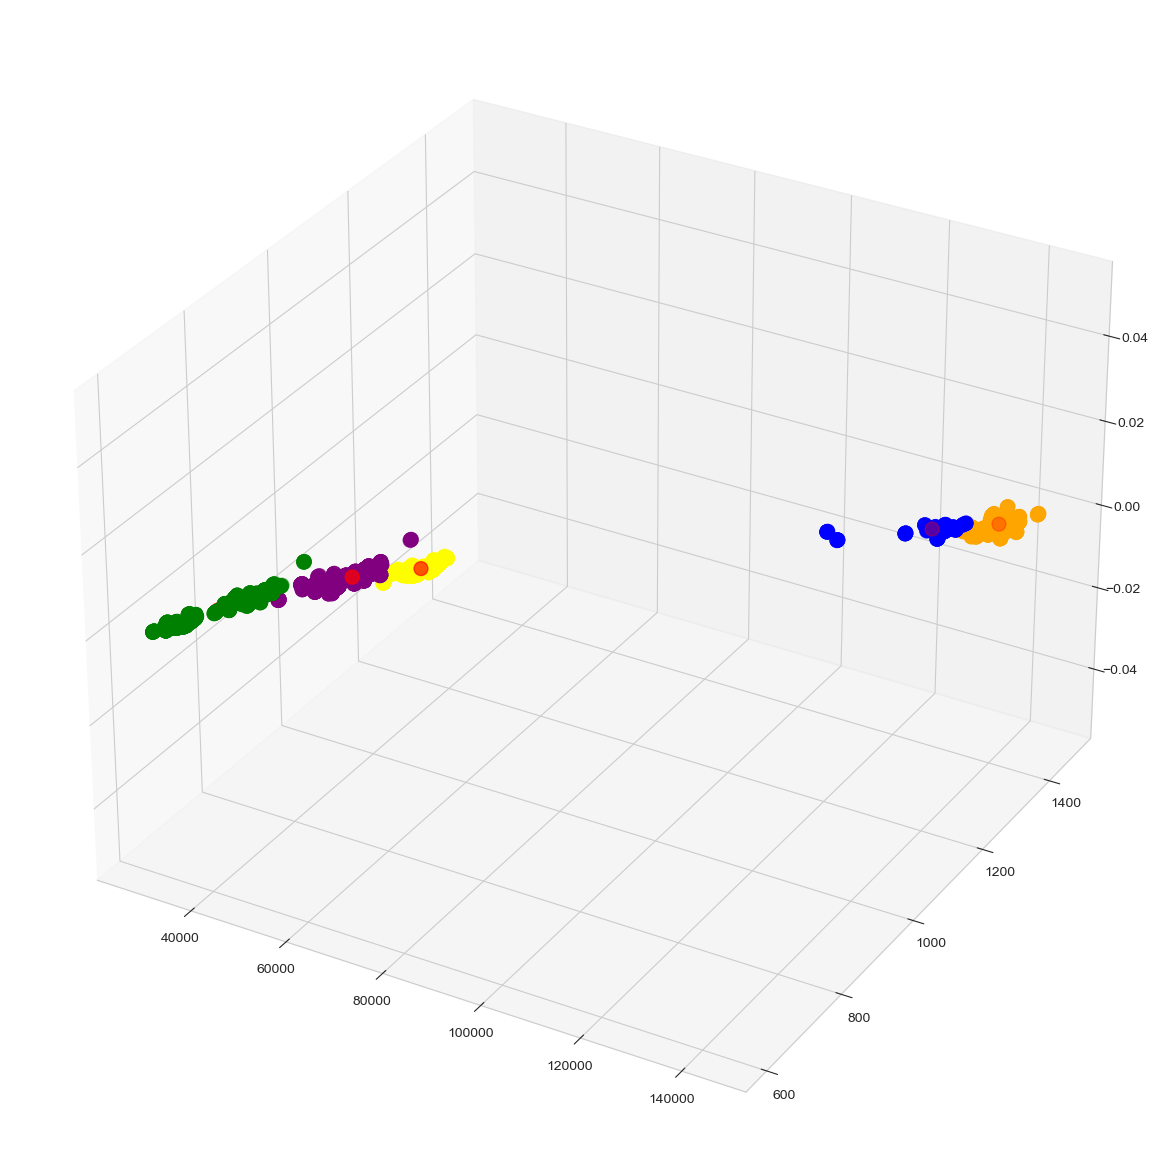

In [13]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
# plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
# plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
# plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'SEKER')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'BARBUNYA')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'BOMBAY')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'CALI')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'blue', label = 'HOROZ')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()